<a href="https://colab.research.google.com/github/gmshroff/metaLearning2022/blob/main/code/nb0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRAINING DEEP NEURAL NETWORKS

In [2]:
!pip install import_ipynb --quiet

In [1]:
import requests

In [2]:
#If on colab:
r=requests.get("https://github.com/gmshroff/metaLearning2022/blob/main/code/utils.ipynb?raw=true")
with open('./utils.ipynb','wb') as f: f.write(r.content)
r=requests.get("https://github.com/gmshroff/metaLearning2022/blob/main/code/course_data.ipynb?raw=true")
with open('./course_data.ipynb','wb') as f: f.write(r.content)


In [3]:
from google.colab import drive
drive.mount('/content/drive')
%ls drive/MyDrive/'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
experimental.ipynb  models.ipynb


In [4]:
!cp drive/MyDrive/'Colab Notebooks'/models.ipynb .

In [5]:
import import_ipynb
import utils
#HW 1 - write code for models in models.ipynb
import models
from IPython import display
import torch
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import pickle

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from models.ipynb


In [6]:
#If on colab
from course_data import MyDS, ImageData

importing Jupyter notebook from course_data.ipynb


Random data in $\mathcal{R}^N$ in $C$ clusters/classes.

In [7]:
#Generate data - euclidean
train_ds, test_ds, dloader = utils.euclideanDataset(n_samples=10000,n_features=20,n_classes=10,batch_size=32)

Using random data in $\mathcal{R}^4$ as above to generate sin wave mixures; each class has different mean frequencies and amplitues.

Project data down to a 2-D space for visualiation.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


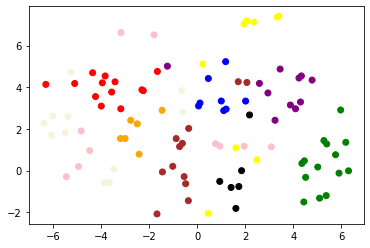

In [9]:
tsne = TSNE()
X_2d = tsne.fit_transform(train_ds.samples[0:100])
colors=["red","green","blue","yellow","pink","black","orange","purple","beige","brown"]
labcol=lambda i: colours[i]
plt.scatter(X_2d[:,0],X_2d[:,1],c=[colors[l] for l in train_ds.labels[0:100]])
plt.show()

Time series data

In [40]:
#Generate data - sinusoidal mix
train_ds, test_ds, dloader = utils.sinDataset(n_samples=100,length=20,n_classes=5,batch_size=1)

Image data from NAR project

In [7]:
#If on Colab/student machine use the next few lines to load image data:
r=requests.get("https://github.com/gmshroff/metaLearning2022/blob/main/data/image_data.pickle.zip?raw=true")

In [8]:
with open('./image_data.pickle.zip','wb') as f: f.write(r.content)

In [9]:
!unzip ./image_data.pickle.zip

Archive:  ./image_data.pickle.zip
  inflating: image_data.pickle       


In [10]:
with open('./image_data.pickle','rb') as f: imageData=pickle.load(f)

In [11]:
train_ds,test_ds,mapping,dloader=imageData.train_ds,imageData.test_ds,imageData.mapping,imageData.dloader

In [ ]:
plt.imshow([t for t in train_ds][11][0].reshape(20,20))

In [ ]:
mapping[int(train_ds.labels[11])]

In [ ]:
len(mapping.keys())

In [ ]:
mapping

The well-known MNIST data of handwritten characters.

In [ ]:
train_ds, test_ds, dloader = utils.mnist_data(frac=0.25,download=True)

In [ ]:
plt.imshow(train_ds.samples.reshape(15000,28,28)[10])
plt.show()

In [15]:
train_ds.samples[0].shape

torch.Size([784])

In [ ]:
net(train_ds.samples[10].unsqueeze(0))

Simple MLP

In [18]:
# Define an MLP network. Note that input dimension has to be data dimension. For classification
# final dimension has to be number of classes; for regression one.
#torch.manual_seed(10)
#net = models.MLP(dims=[20,128,64,10])
#net = models.MLP(dims=[400,128,64,74])
net = models.MLP(dims=[784,128,64,10])
#net = models.MLP(dims=[20,128,64,5])

Recurrent neural network.

In [ ]:
# Define an RNN to process a sequence; default is 1-D where input can be (batch,seq_vals) else input will need to be given
# with an extra dimension and input will be (batch,seq,features)
net = models.SimpleRNN(input_size=1,hidden_size=32,output_size=5,lr=1e-3)

In [16]:
net = models.SimpleLSTM(input_size=1,hidden_size=32,output_size=5,lr=1e-3)

Train the network

In [19]:
# Train the network; note that network is trained in place so repeated calls further train it.
net,losses,accs=models.Train(net,dloader,epochs=50,verbose=True)

Epoch   49 Loss: 3.97907e-06 Accuracy: 1.00000


Accuracy on training set.

In [39]:
#Training accuracy.
models.accuracy(net,train_ds.samples,train_ds.labels,verbose=True)

24218.0 24475


0.9894994892747702

Accuracy on test set.

In [20]:
# Test accuracy.
models.accuracy(net,test_ds.samples,test_ds.labels)

9684.0 10000


0.9684